## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import numpy as np
import pandas as pd

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [4]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [5]:
import matplotlib.pyplot as plt

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [17]:
from datetime import datetime
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB']
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 7, 1)
stock_data = web.get_data_yahoo(symbols, start_date, end_date)
stock_data = stock_data['Adj Close'] 
print(stock_data)

Symbols           MSFT         AMZN       AAPL         GOOG          FB
Date                                                                   
2019-01-02   98.602066  1539.130005  38.249401  1045.849976  135.679993
2019-01-03   94.974693  1500.280029  34.439476  1016.059998  131.740005
2019-01-04   99.391899  1575.390015  35.909672  1070.709961  137.949997
2019-01-07   99.518669  1629.510010  35.829746  1068.390015  138.050003
2019-01-08  100.240234  1656.579956  36.512772  1076.280029  142.529999
...                ...          ...        ...          ...         ...
2019-06-25  131.146851  1878.270020  47.754868  1086.349976  188.839996
2019-06-26  131.638290  1897.829956  48.787762  1079.800049  187.660004
2019-06-27  131.854507  1904.280029  48.773113  1076.010010  189.500000
2019-06-28  131.667801  1893.630005  48.328697  1080.910034  193.000000
2019-07-01  133.358353  1922.189941  49.215084  1097.949951  193.000000

[125 rows x 5 columns]


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

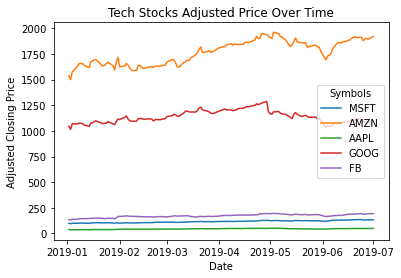

In [55]:
plots = [plt.plot(stock_data.index, stock_data[x], label = x) for x in symbols]
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Tech Stocks Adjusted Price Over Time')
plt.legend(title = 'Symbols', loc = 'center right')
plt.draw()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

<Figure size 1152x648 with 0 Axes>

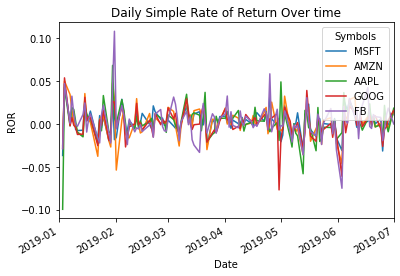

<Figure size 1152x648 with 0 Axes>

In [41]:
simple_ret = stock_data.pct_change()
simple_ret.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.xlim('2019-01', '2019-07')
plt.figure(figsize=(16,9))


### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

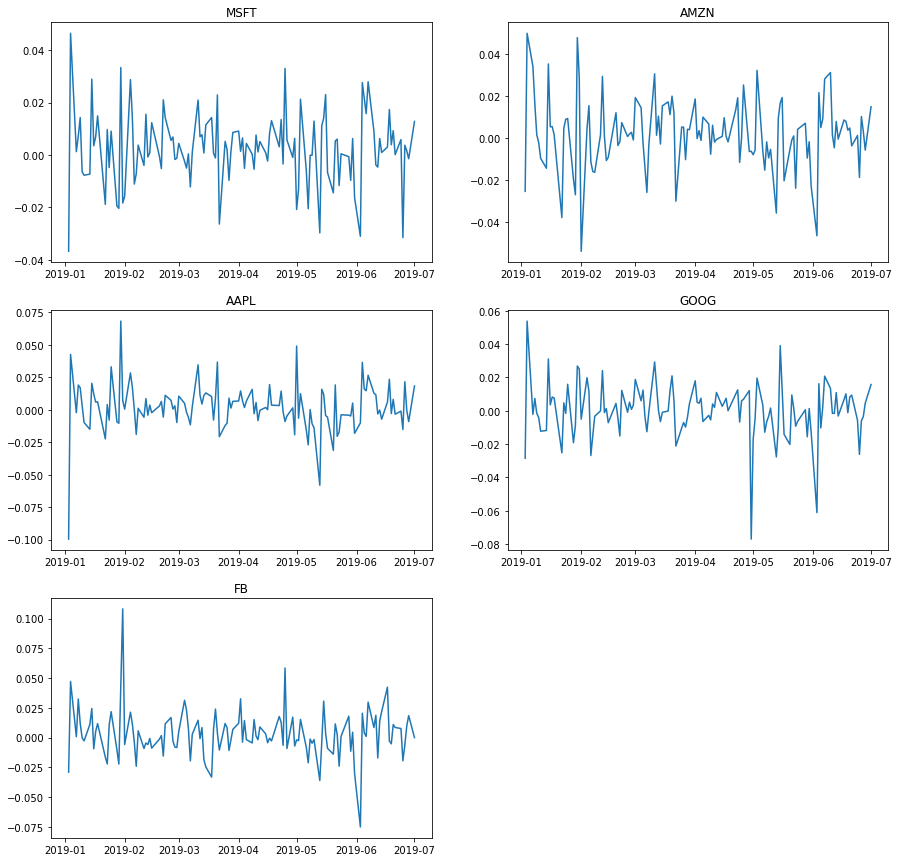

In [64]:
fig = plt.figure(figsize = (15, 15))
subplots = [plt.subplot(3,2,x) for x in range(1,6)]
plots = [x.plot(stock_data[y].pct_change()) for y, x in zip(symbols, subplots)]
titles = [x.set_title(y) for y, x in zip(symbols, subplots)]

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

Symbols
MSFT    0.002532
AMZN    0.001933
AAPL    0.002208
GOOG    0.000522
FB      0.003046
dtype: float64


Text(0.5, 1.0, 'daily mean rate of return')

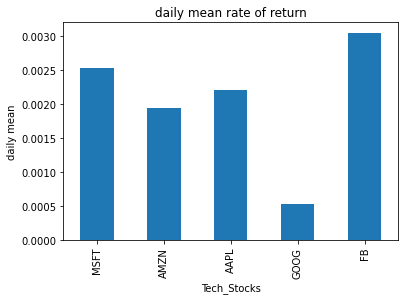

In [71]:
mean_ret = simple_ret.mean()
print(mean_ret)
mean_ret.plot.bar()
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title('daily mean rate of return')

Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

Symbols
MSFT    0.000191
AMZN    0.000280
AAPL    0.000345
GOOG    0.000258
FB      0.000408
dtype: float64


Text(0.5, 1.0, 'daily variance')

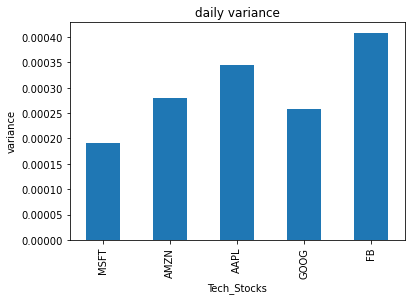

In [75]:
var = simple_ret.var()
print(var)
var.plot.bar()
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

Symbols
MSFT    0.013802
AMZN    0.016742
AAPL    0.018576
GOOG    0.016068
FB      0.020209
dtype: float64


Text(0.5, 1.0, 'daily std')

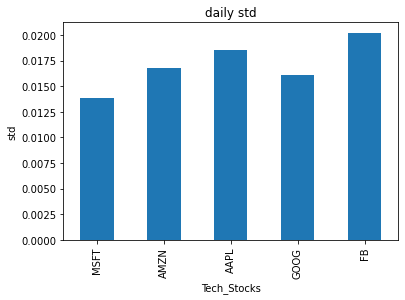

In [79]:
stdev = np.sqrt(simple_ret.var())
print(stdev)
stdev.plot.bar()
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [81]:
corr_matrix = simple_ret.corr()
print(corr_matrix)

Symbols      MSFT      AMZN      AAPL      GOOG        FB
Symbols                                                  
MSFT     1.000000  0.731493  0.652943  0.636986  0.454094
AMZN     0.731493  1.000000  0.610109  0.721504  0.572073
AAPL     0.652943  0.610109  1.000000  0.569773  0.438761
GOOG     0.636986  0.721504  0.569773  1.000000  0.633440
FB       0.454094  0.572073  0.438761  0.633440  1.000000


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.